# 首先从tensor获取数据并解析
仅此处用到tensorflow的代码，其余时刻采用numpy。

tensorflow中包含mnist数据集，无需自己去下载，一行命令即可使用

In [1]:
import tensorflow as tf
(trainX,trainY),(testX,testY)=tf.keras.datasets.mnist.load_data()
print(f"trainX:{trainX.shape},trainY:{trainY.shape}")
print(f"testX:{testX.shape},testY:{testY.shape}")

trainX:(60000, 28, 28),trainY:(60000,)
testX:(10000, 28, 28),testY:(10000,)


# 设计神经网络各层维度，并将数据集归一化
输入层为图片的长*宽，隐藏层为100，输出层为10

仅选择2000张图片进行训练

根据sigmoid函数，将训练集的每一个值设定在-1，1之间

In [2]:
import numpy as np
SIZE_OF_TRAIN_SET=2000
inputDimension=trainX.shape[1]**2
hiddenDimension=200
outputDimension=10
# reshape and choose
trainXChoose=np.array(trainX.reshape((trainX.shape[0],inputDimension))[0:SIZE_OF_TRAIN_SET],dtype=float)
trainYChoose=np.zeros((SIZE_OF_TRAIN_SET,10),float)
for i in range(0,SIZE_OF_TRAIN_SET):
    trainYChoose[i][trainY[i]]=1
# 归一化
trainXChoose=(trainXChoose-127.5)/127.5

# 构建测试集，选择testX中的前100张作为测试集
TEST_SIZE=100
testXChoose=np.array(np.reshape(testX,(testX.shape[0],inputDimension))[0:TEST_SIZE],dtype=float)
testXChoose=(testXChoose-127.5)/127.5
testYChoose=np.zeros((TEST_SIZE,10),float)
for i in range(TEST_SIZE):
    testYChoose[i][testY[i]]=1

# Train
迭代3000次，学习率为0.001，batch设为64

In [3]:
from ANN import ANNModel
epoch=3000
model=ANNModel(inputDimension,hiddenDimension,outputDimension,epoch,0.001)
model.train(trainXChoose,trainYChoose,testXChoose,testYChoose,batch=64)

epoch:0,trainLoss:4562.930148431862,valLoss:229.08409664532002
epoch:100,trainLoss:3417.3911650418854,valLoss:175.3890248732954
epoch:200,trainLoss:3277.2486579517736,valLoss:168.95661396779732
epoch:300,trainLoss:3209.4858416840016,valLoss:165.9315414883862
epoch:400,trainLoss:3164.555911949067,valLoss:164.24017864634735
epoch:500,trainLoss:3131.951861638758,valLoss:163.083621072272
epoch:600,trainLoss:3107.889487236375,valLoss:162.34821898559787
epoch:700,trainLoss:3086.127487318287,valLoss:161.79842460223327
epoch:800,trainLoss:3068.132709739743,valLoss:161.23321191413945
epoch:900,trainLoss:3054.6164355786195,valLoss:160.97639983683024
epoch:1000,trainLoss:3041.435886920726,valLoss:160.68846739286082
epoch:1100,trainLoss:3030.4656640636467,valLoss:160.43179123879958
epoch:1200,trainLoss:3022.2136537841648,valLoss:160.230771371526
epoch:1300,trainLoss:3013.136809306639,valLoss:159.94778043943018
epoch:1400,trainLoss:3007.559769700576,valLoss:159.7709814940672
epoch:1500,trainLoss:30

# 绘图
查看训练结果

可以看出，Loss和accuracy收敛正常

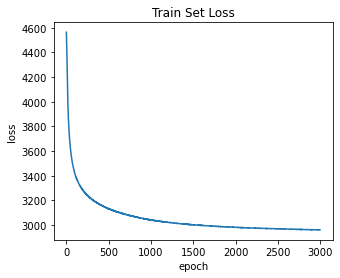

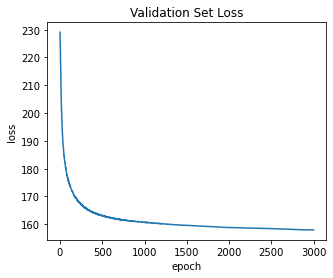

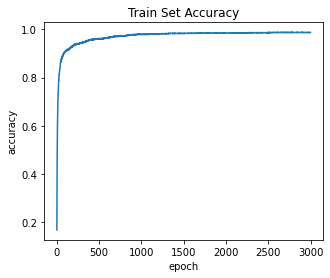

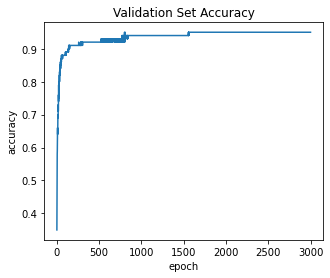

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = (5.0, 4.0)
# 训练集损失曲线
plt.plot(range(epoch),model.trainLoss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Train Set Loss')
plt.show()
# 验证集损失曲线
plt.plot(range(epoch),model.valLoss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Validation Set Loss')
plt.show()
# 训练集准确率
plt.plot(range(epoch),model.trainAccuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train Set Accuracy')
plt.show()
# 验证集准确率
plt.plot(range(epoch),model.valAccuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Validation Set Accuracy')
plt.show()

# Predict

In [5]:
TEST_SIZE=100
testXChoose=np.array(np.reshape(testX,(testX.shape[0],inputDimension))[-TEST_SIZE:],dtype=float)
testXChoose=(testXChoose-127.5)/127.5
trueCount=0
for i in range(TEST_SIZE):
    (ans,propability)=model.predict(testXChoose[i])
    # print(f"ans:{ans},prob:{propability},trueVal:{testY[i-TEST_SIZE]}")
    if ans[0]==testY[i-TEST_SIZE]:
        trueCount+=1
print(f"true ratio : {trueCount/TEST_SIZE*100}%")


true ratio : 88.0%
